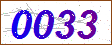

In [1]:
import cv2
import requests
# pip install --upgrade pillow


# with open ('kaptch.jpg', 'wb') as f:
#     res = requests.get('http://gcis.nat.gov.tw/pub/kaptch.jpg')
#     f.write(res.content)
from PIL import Image
#image = Image.open('C:\\Users\\USER\\Desktop\\test\\captua1.png')
image = Image.open('canCut.png')
image

In [2]:
import PIL
import numpy
pil_image = PIL.Image.open('canCut.png').convert('RGB')
#pil_image = PIL.Image.open('C:\\Users\\USER\\Desktop\\test\\captua1.png').convert('RGB')
open_cv_image = numpy.array(pil_image)

Populating the interactive namespace from numpy and matplotlib


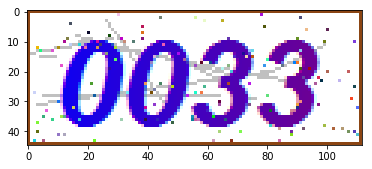

In [3]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [4]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key = lambda x:x[1])

In [5]:
ary =[]
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    #if w >= 20 and h >=75 and h<=110:
    if w >=15 and h >10:
        ary.append((x, y, w, h))

(1, 1, 110, 43)
(2, 39, 3, 3)
(9, 11, 3, 3)
(11, 9, 22, 31)
(11, 9, 3, 3)
(12, 8, 3, 3)
(13, 3, 3, 3)
(15, 32, 1, 1)
(17, 36, 1, 1)
(17, 14, 10, 21)
(19, 6, 3, 3)
(20, 23, 3, 3)
(21, 27, 3, 3)
(23, 12, 1, 1)
(26, 7, 3, 3)
(29, 16, 1, 1)
(30, 8, 3, 3)
(33, 9, 22, 31)
(34, 9, 3, 3)
(37, 8, 3, 3)
(37, 6, 3, 3)
(37, 4, 3, 3)
(39, 14, 10, 21)
(40, 26, 3, 3)
(41, 30, 3, 3)
(43, 23, 3, 3)
(43, 1, 3, 3)
(45, 11, 1, 1)
(47, 36, 3, 3)
(52, 27, 3, 3)
(54, 35, 3, 3)
(54, 8, 23, 32)
(55, 17, 3, 3)
(57, 26, 3, 3)
(57, 16, 3, 3)
(63, 29, 3, 4)
(73, 23, 3, 3)
(73, 15, 1, 1)
(76, 8, 22, 32)
(78, 4, 3, 3)
(84, 17, 3, 3)
(87, 39, 3, 3)
(89, 16, 3, 3)
(90, 1, 3, 3)
(91, 38, 3, 3)
(95, 23, 3, 3)
(96, 30, 3, 3)
(96, 21, 3, 3)
(97, 22, 3, 3)
(98, 9, 3, 3)
(99, 19, 3, 3)
(99, 5, 3, 3)
(101, 38, 3, 3)
(106, 19, 3, 3)
(107, 28, 3, 3)
(108, 39, 3, 3)
(108, 24, 3, 3)
(108, 9, 3, 3)


In [6]:
print(ary)

[(1, 1, 110, 43), (11, 9, 22, 31), (33, 9, 22, 31), (54, 8, 23, 32), (76, 8, 22, 32)]


Populating the interactive namespace from numpy and matplotlib


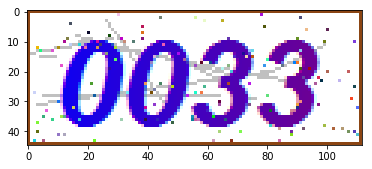

In [7]:
%pylab inline
plt.imshow(open_cv_image)

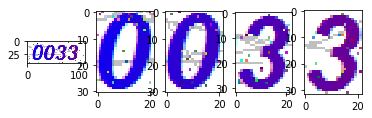

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x, y, w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

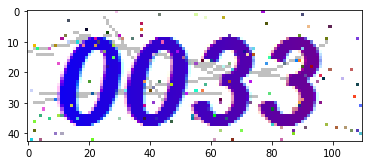

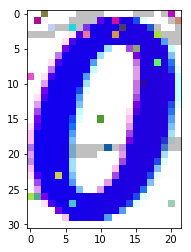

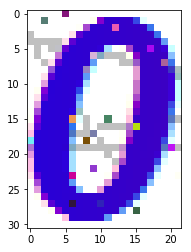

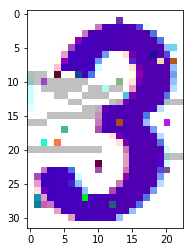

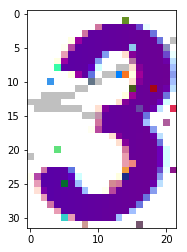

In [9]:
from matplotlib import pyplot as plt
for id, (x, y, w, h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.png'.format(id+1), dpi=100)
  